In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
credit_risk= pd.read_excel("CCC.xlsx")
print(credit_risk.head())

   Application_Rk  APPL_PA_TAX_ID  APPL_SCR_NO      APPL_AMT   ACC_APP_AMT  \
0               9               4          814  69357.925599  52018.444199   
1              24               4          781  33942.000000  25456.500000   
2              27               4          723  24332.000000  18249.000000   
3              29               2          179  51917.000000  38937.750000   
4              30               5          532  45365.000000  34023.750000   

   ACC_APPL_PCL_VAL_AMT  APPL_PCL_TYP_CD  APPL_PA_ANNL_INC_AMT  \
0                  6572                0           58743.97706   
1                  1472                0           26365.00000   
2                  4860                0           22794.00000   
3                  7140                0           51205.00000   
4                  9360                1           32080.00000   

   APPL_PA_HHD_INC_AMT  APPL_PA_EDU_CD  ...  ACC_CADV_LST_3M_AMT  \
0                82892               0  ...                 3692  

In [5]:
df= credit_risk.copy()
# Lets check the statistics of data
print(df.describe())
# checking for missing values
print(df.isnull().sum())

       Application_Rk  APPL_PA_TAX_ID   APPL_SCR_NO       APPL_AMT  \
count    10001.000000    10001.000000  10001.000000   10001.000000   
mean      7039.052995        4.015298    500.901210   69357.925599   
std       4032.055764        1.770329    232.568023   37848.869161   
min          2.000000        1.000000    100.000000    5663.000000   
25%       3583.000000        3.000000    300.000000   45470.000000   
50%       6911.000000        4.000000    499.000000   61526.000000   
75%      10605.000000        5.000000    706.000000   81542.000000   
max      14000.000000        7.000000    900.000000  613589.000000   

         ACC_APP_AMT  ACC_APPL_PCL_VAL_AMT  APPL_PCL_TYP_CD  \
count   10001.000000          10001.000000     10001.000000   
mean    52018.444199           4996.718728         0.146385   
std     28386.651871           2890.862376         0.353510   
min      4247.250000              0.000000         0.000000   
25%     34102.500000           2504.000000         0.0

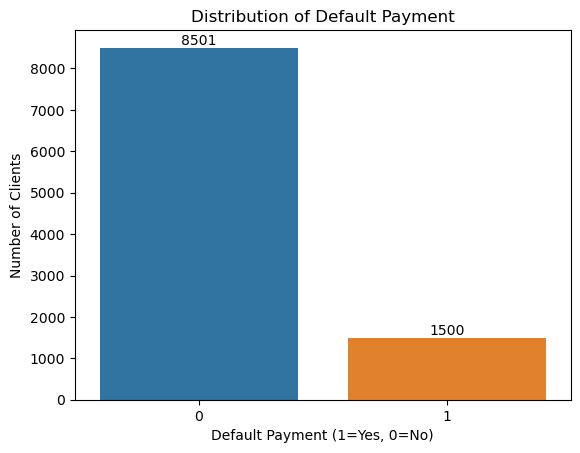

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
ax = sns.countplot(x='TGT_VAR', data=df)

# Add labels and title
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment (1=Yes, 0=No)')
plt.ylabel('Number of Clients')

# Annotate bars with their respective values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

# Show plot
plt.show()

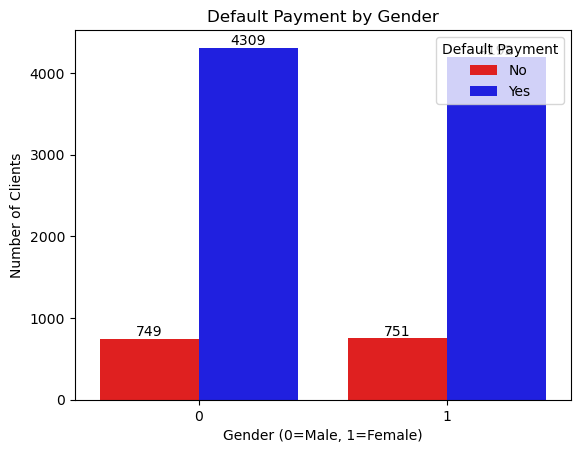

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'default.payment.next.month' column to string
df['TGT_VAR'] = df['TGT_VAR'].astype(str)

# Define custom colors
custom_palette = {"0": "blue", "1": "red"}

# Create countplot with custom palette
ax = sns.countplot(x='APPL_PA_GEN_CD', hue='TGT_VAR', data=df, palette=custom_palette)

# Add labels and title
plt.title('Default Payment by Gender')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Number of Clients')

# Show legend
plt.legend(title='Default Payment', labels=['No', 'Yes'])

# Annotate bars with their respective values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

# Show plot
plt.show()


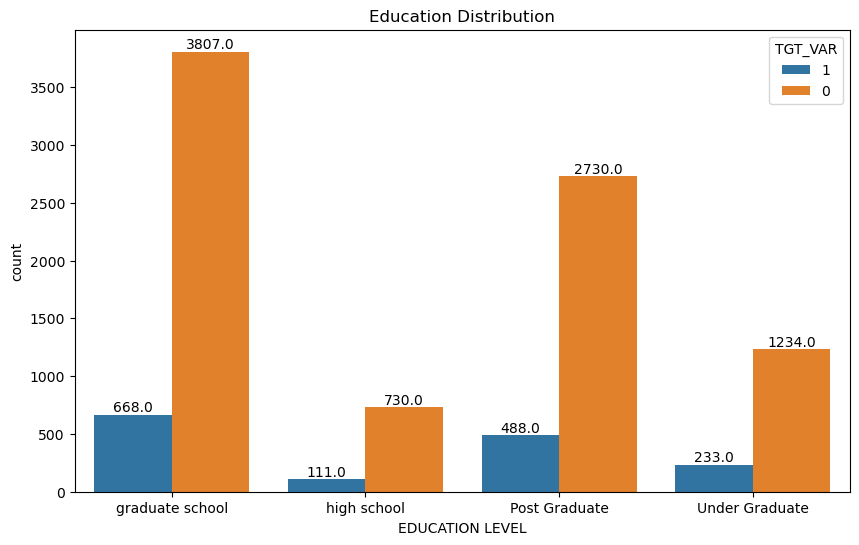

In [34]:
# With EDUCATION columns 
# (1=graduate school, 2=high school, 3= Post Graduate, 4=Under Graduate)
plt.figure(figsize=(10,6))
ax = sns.countplot(x='APPL_PA_EDU_CD', hue='TGT_VAR',data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.xticks([0,1,2,3],labels=["graduate school",'high school','Post Graduate','Under Graduate' ])
plt.xlabel("EDUCATION LEVEL")
plt.title("Education Distribution")
plt.show()

Text(0.5, 1.0, 'MARRIAGE Distribution')

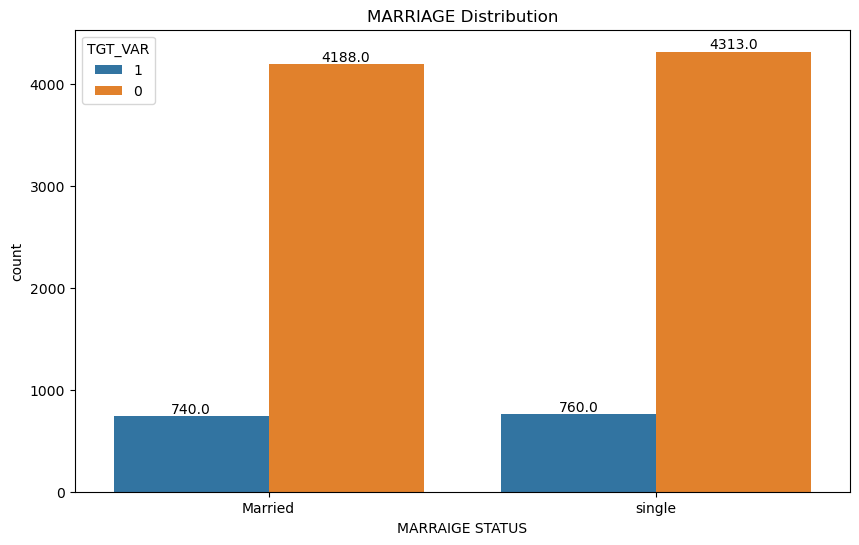

In [35]:
# With MARRIAGE columns 
#
plt.figure(figsize=(10,6))
ax = sns.countplot(x='APPL_PA_MRTL_STS_CD',hue='TGT_VAR',data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.xticks([0,1],labels=["Married", "single"])
plt.xlabel("MARRAIGE STATUS")
plt.title("MARRIAGE Distribution")

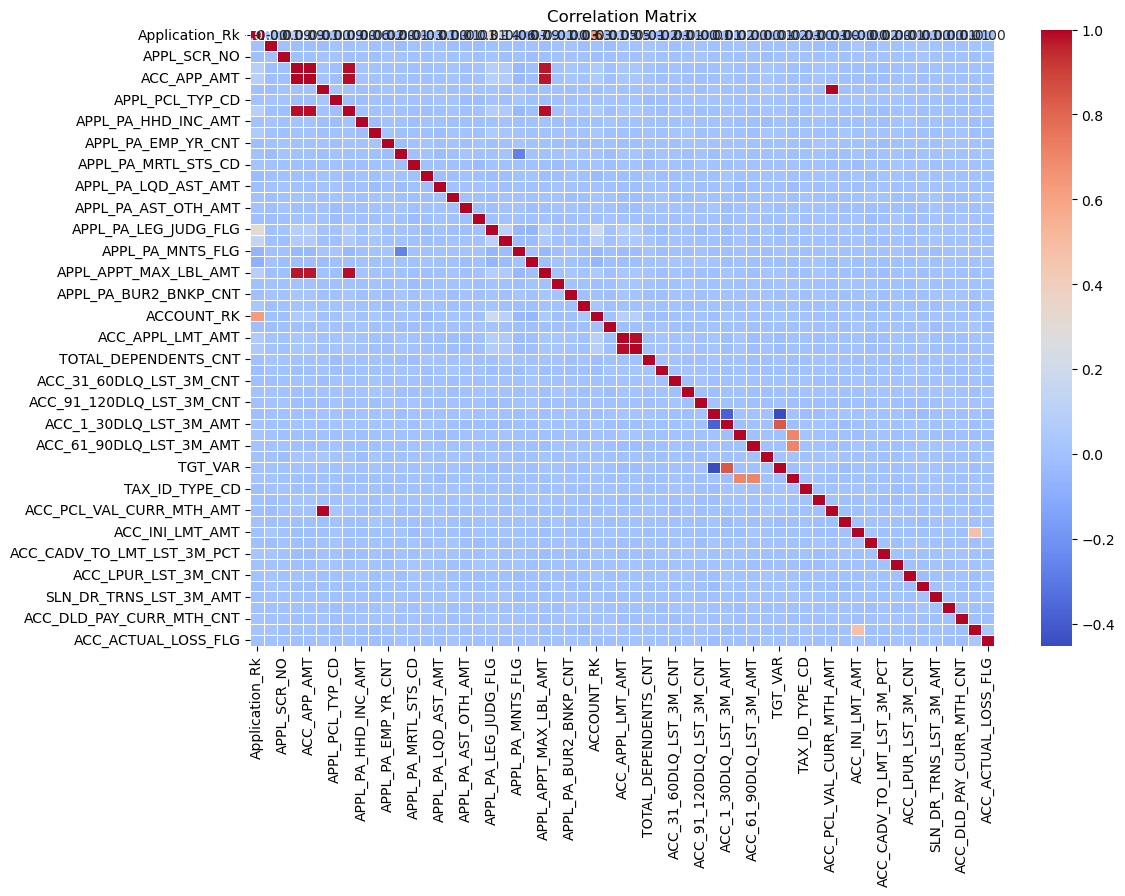

In [16]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [36]:
import statsmodels.api as sm

# Define independent variables (X) and target variable (y)
X = df.drop(['TGT_VAR'], axis=1)
y = df['TGT_VAR']

# Add constant to the independent variables matrix for the intercept term
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y.astype(float), X.astype(float)).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                TGT_VAR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.549e+24
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:37:46   Log-Likelihood:             2.5484e+05
No. Observations:               10001   AIC:                        -5.096e+05
Df Residuals:                    9947   BIC:                        -5.092e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Accuracy: 0.984007996001999
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       1.00      0.90      0.95       311

    accuracy                           0.98      2001
   macro avg       0.99      0.95      0.97      2001
weighted avg       0.98      0.98      0.98      2001

Confusion Matrix:
[[1690    0]
 [  32  279]]


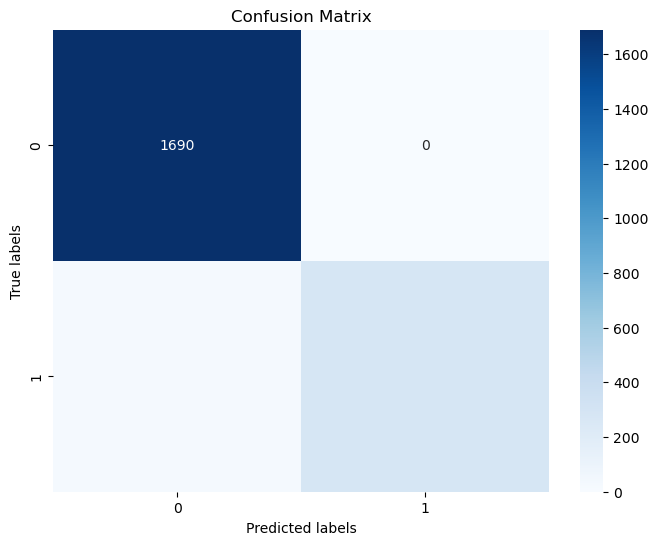

Logistic Regression Accuracy: 0.984007996001999


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define independent variables (X) and target variable (y)
X = df.drop(['TGT_VAR'], axis=1)
y = df['TGT_VAR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import accuracy_score

# Calculate accuracy score for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy_lr)

THIS WAS LOGISTIC REGRESSION WITH CONFUSION MATRIX AND ACCURACY SCORE

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      1.00      1.00       311

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001

Confusion Matrix:
[[1690    0]
 [   0  311]]


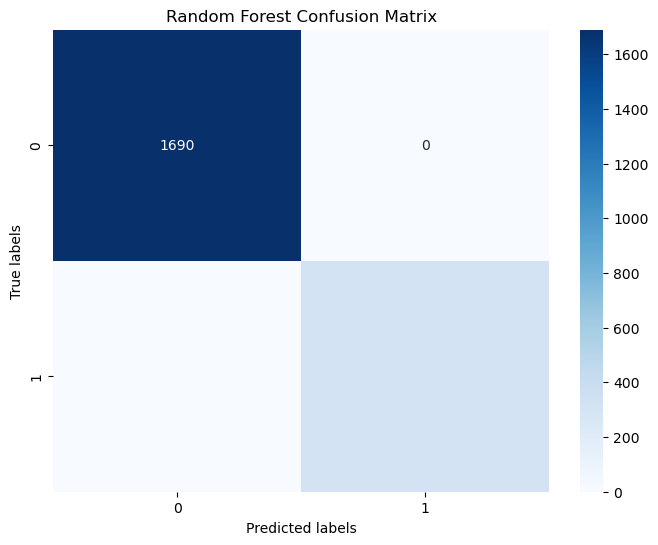

Random Forest Accuracy: 1.0


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Calculate accuracy score for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

THIS WAS RANDOM FOREST WITH CONFUSION MATRIX AND ACCURACY SCORE

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      1.00      1.00       311

    accuracy                           1.00      2001
   macro avg       1.00      1.00      1.00      2001
weighted avg       1.00      1.00      1.00      2001

Confusion Matrix:
[[1690    0]
 [   0  311]]


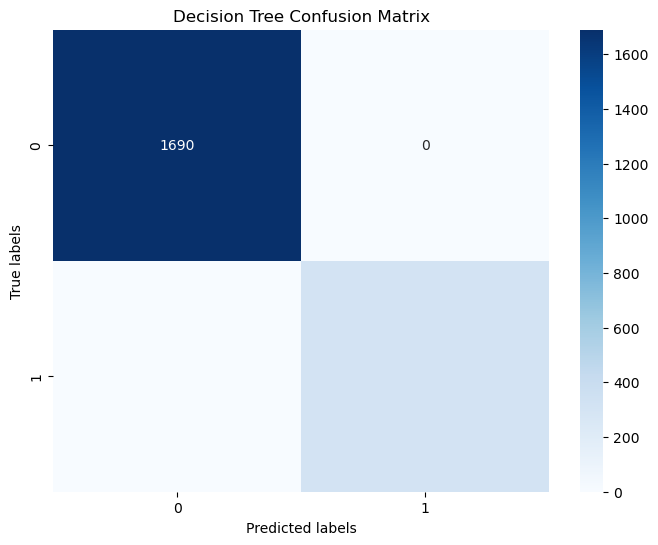

Decision Tree Accuracy: 1.0


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Calculate accuracy score for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)